In [98]:
import pandas as pd
import os 
import itertools
import matplotlib.pyplot as plt

In [71]:
dfs =[]
path_to_dir = "../output/smk_out/bench/"

In [72]:
for file in os.listdir(path_to_dir):
    if file.endswith(".tsv"):
        df = pd.read_csv(path_to_dir+file, skiprows=1, header=None, delimiter= "\t")
        dfs.append(df.iloc[0])



In [81]:
final_df = pd.concat(dfs, axis=1).T
final_df.columns = ["s","h:m:s","max_rss","max_vms","max_uss","max_pss","io_in","io_out","mean_load","cpu_time"]
final_df.reset_index(inplace=True, drop=True)
final_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,561.6232,0:09:21,1242.02,2175.02,468.22,593.28,0.0,0.0,99.0,556.52
1,737.8046,0:12:17,1556.94,2036.34,301.21,586.81,0.0,0.0,95.48,704.7
2,580.4043,0:09:40,1779.54,2055.84,279.88,595.16,31.48,0.0,95.6,555.28
3,1281.8748,0:21:21,1046.86,2057.57,243.58,294.64,12.55,0.0,62.84,806.43
4,883.8366,0:14:43,1791.56,2046.26,211.91,426.05,9.06,0.0,92.24,815.08
5,1361.6274,0:22:41,1118.14,2057.57,256.12,263.43,23.95,0.0,59.67,813.46
6,1201.2514,0:20:01,1233.27,2279.46,436.54,565.99,21.2,0.0,58.3,701.15
7,608.074,0:10:08,1926.12,2055.39,566.32,958.32,0.0,0.0,96.04,584.24
8,764.1737,0:12:44,960.36,2057.91,312.61,393.32,0.0,0.0,88.68,677.88
9,833.4201,0:13:53,1912.62,2068.74,257.54,496.94,15.43,0.0,91.2,760.02


In [82]:
sample = ["SRR1976948", "SRR1977249","SRR1977296","SRR1977304","SRR1977357","SRR1977365"]
sample_triplicate = list(itertools.chain.from_iterable(itertools.repeat(x, 3) for x in sample))
trial = [1,2,3]*6

In [100]:
label_df = pd.DataFrame({"sample":sample_triplicate,"trial":trial})
main = label_df.join(final_df,how='left')

In [104]:

#del main['h:m:s']

In [133]:
def plot_line(metric):
    #metric = 'cpu_time'
    grouped_data = main.groupby(by='sample')[metric].mean()

    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(grouped_data.index, grouped_data.values, linestyle='solid')
    plt.xlabel('Sample')
    plt.ylabel(metric)

    trials = main[metric]
    sample = main['sample']

    plt.scatter(sample, trials, marker='o', color='black',s=10, alpha=0.5)
    plt.scatter(grouped_data.index, grouped_data.values, marker='x', color = 'green' )
    trial_trck =np.array(["1","2","3"]*6).flatten()

    for i in range(len(sample)):
        plt.text(sample[i], trials[i], str(trial_trck[i]))

    plt.show()

In [117]:
import numpy as np
np.array(["1","2","3"]*6).flatten()

array(['1', '2', '3', '1', '2', '3', '1', '2', '3', '1', '2', '3', '1',
       '2', '3', '1', '2', '3'], dtype='<U1')

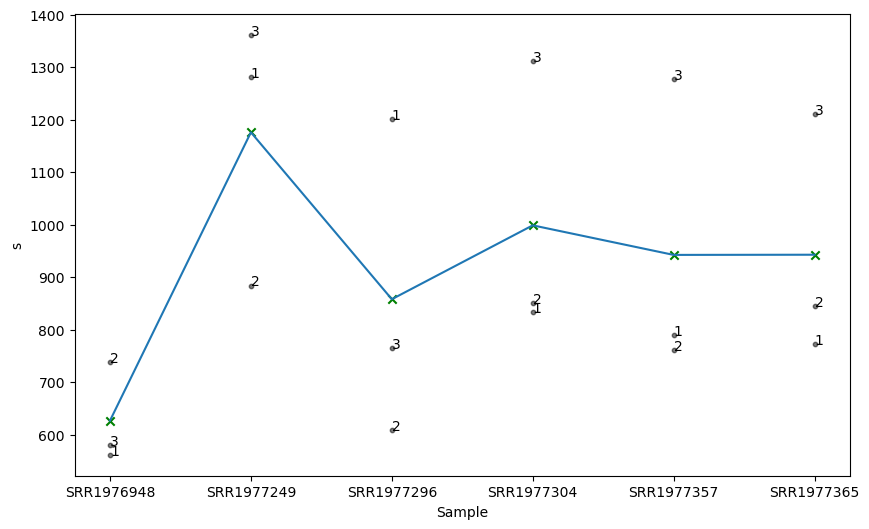

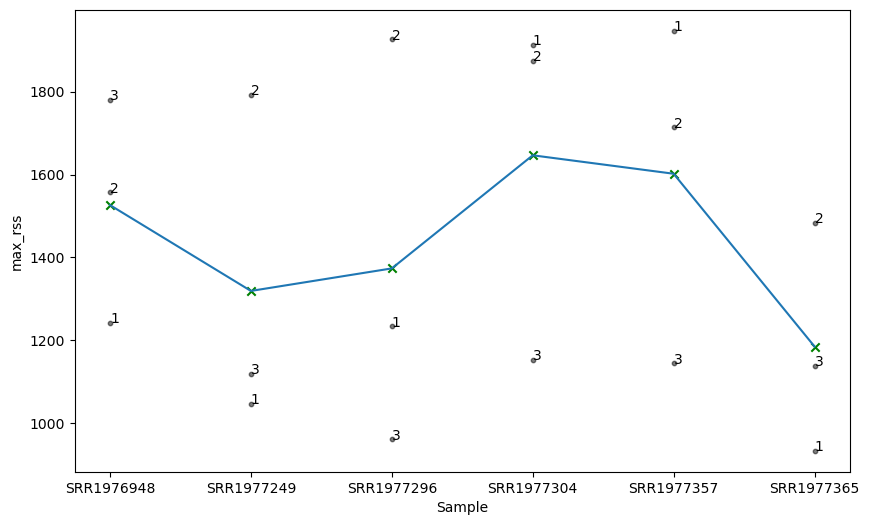

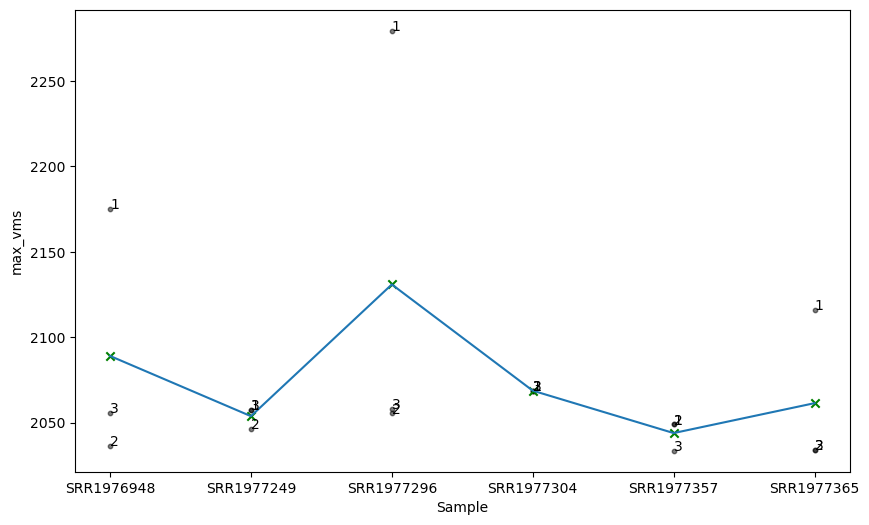

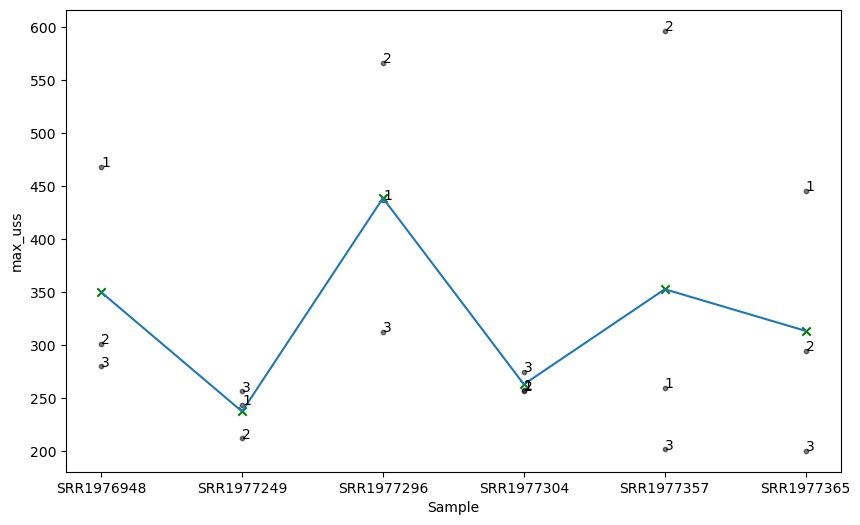

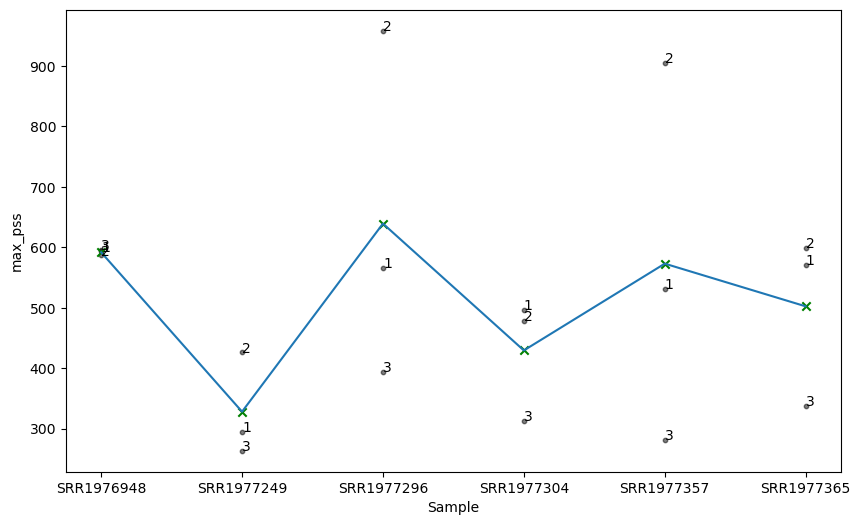

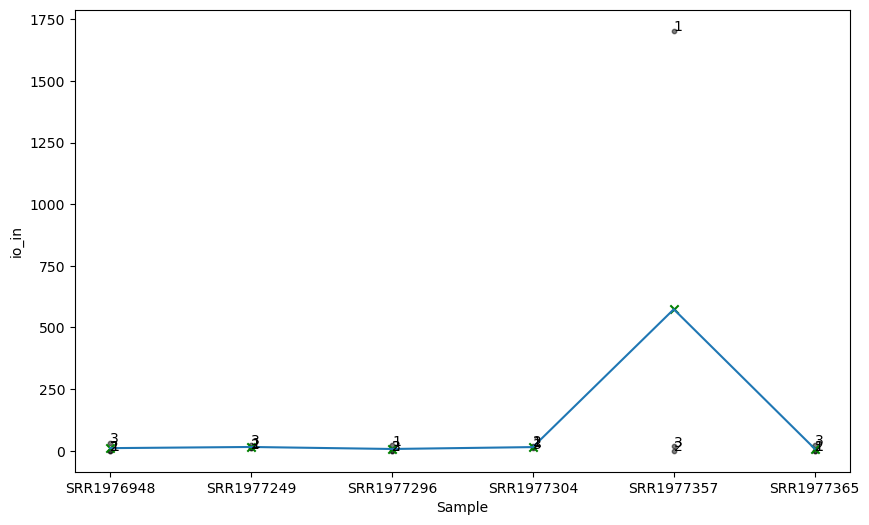

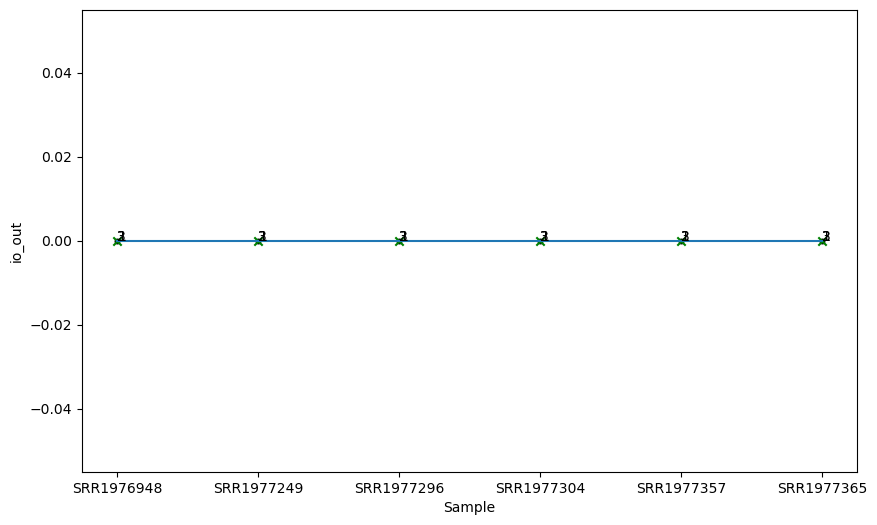

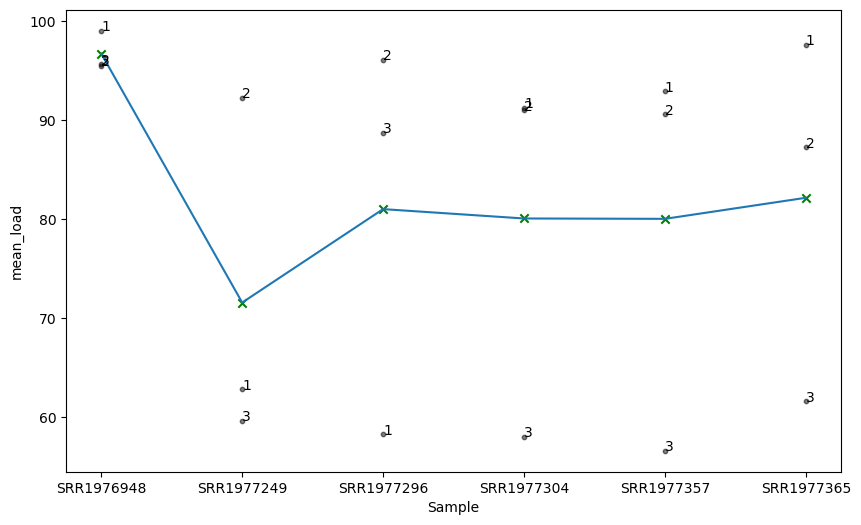

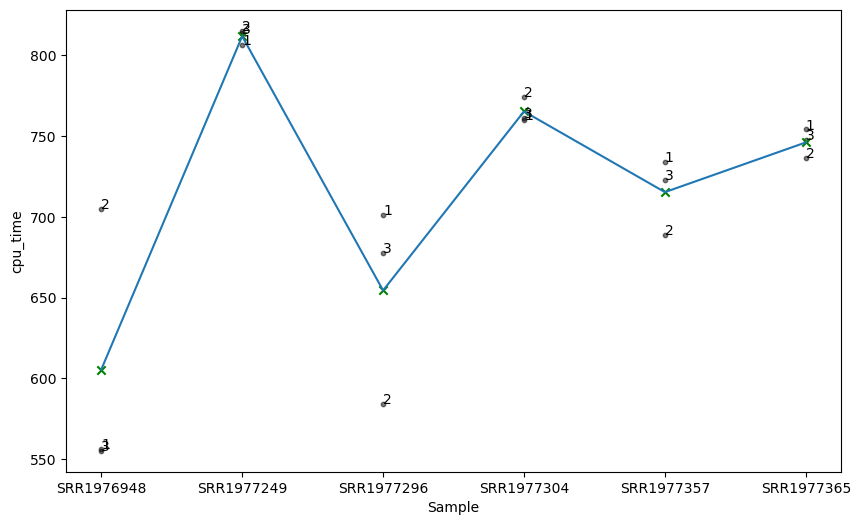

In [135]:
for i in main.columns[2:]:
    plot_line(i)